In [0]:
import pandas as pd

In [0]:
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/datasets/fakenews.csv')

In [5]:
data.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [6]:
data.dropna()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [0]:
X= data.drop('label',axis=1)

In [0]:
y = data['label']

In [9]:
print(X.shape)
print(y.shape)

(20800, 4)
(20800,)


In [0]:
import tensorflow as tf

In [0]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense

In [0]:
messages = X.copy()
messages.reset_index(inplace=True)

In [13]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_esp.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipp

True

In [0]:
import re
from nltk.corpus import stopwords

In [0]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus=[]

In [0]:
for c in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ',str( messages['title'][c]))
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [17]:
corpus

['hous dem aid even see comey letter jason chaffetz tweet',
 'flynn hillari clinton big woman campu breitbart',
 'truth might get fire',
 'civilian kill singl us airstrik identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri',
 'jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video breitbart',
 'life life luxuri elton john favorit shark pictur stare long transcontinent flight',
 'beno hamon win french socialist parti presidenti nomin new york time',
 'excerpt draft script donald trump q ampa black church pastor new york time',
 'back channel plan ukrain russia courtesi trump associ new york time',
 'obama organ action partner soro link indivis disrupt trump agenda',
 'bbc comedi sketch real housew isi caus outrag',
 'russian research discov secret nazi militari base treasur hunter arctic photo',
 'us offici see link trump russia',
 'ye paid govern troll social media blog forum websit',
 'major leagu soccer argentin find hom

In [0]:
#initialize vocabulary size
vocabulary_size = 5000

In [19]:
#one hot reresentation

onehot =[one_hot(words,vocabulary_size)for words in corpus]
onehot

[[4100, 735, 2561, 4626, 1016, 4647, 1800, 503, 950, 4682],
 [3347, 1837, 95, 4295, 606, 865, 4718],
 [1228, 4467, 1178, 2841],
 [4638, 4579, 2321, 225, 2309, 3485],
 [2860, 606, 167, 1648, 3547, 4270, 606, 2887, 3286, 2474],
 [1770,
  4266,
  4534,
  518,
  2987,
  3896,
  98,
  3893,
  3290,
  1336,
  3686,
  3822,
  4012,
  4735,
  4718],
 [3028, 3028, 2143, 2319, 2107, 3209, 4679, 3760, 1977, 4254, 93, 2235],
 [3067, 821, 829, 1835, 2737, 1928, 3505, 2973, 4644, 564, 1389],
 [2227, 4147, 1934, 153, 3896, 26, 1137, 1209, 3407, 4868, 4644, 564, 1389],
 [2592, 4520, 1477, 4974, 1477, 381, 3896, 1957, 4644, 564, 1389],
 [3222, 1226, 4925, 3665, 1152, 4850, 203, 2515, 3896, 1548],
 [3591, 3933, 1052, 841, 942, 2198, 3799, 1199],
 [2246, 1355, 4453, 2952, 3209, 39, 540, 4775, 1853, 3972, 221],
 [225, 1073, 1016, 4850, 3896, 1477],
 [995, 4008, 3912, 2955, 3180, 3156, 718, 1294, 2005],
 [785, 3285, 1776, 1656, 227, 324, 3074, 4644, 564, 1389],
 [1386, 3430, 1807, 1305, 179, 4644, 564, 138

In [0]:
#sentence length are different to make fixed perform pad_sequences(embedding sequences)
#Embedding representation

In [21]:
sentence_length = 20
embedding = pad_sequences(onehot,padding = 'pre',maxlen = sentence_length)  #if 'post' is replaced  in "pre" it will add 0s at the end 
print(embedding)

[[   0    0    0 ...  503  950 4682]
 [   0    0    0 ...  606  865 4718]
 [   0    0    0 ... 4467 1178 2841]
 ...
 [   0    0    0 ... 4644  564 1389]
 [   0    0    0 ... 2293 2888  301]
 [   0    0    0 ... 3101 3391 4387]]


In [22]:
len(embedding)

20800

In [24]:
#creating model

embedding_vector_features = 40
model = Sequential()
model.add(Embedding(vocabulary_size,embedding_vector_features,input_length=sentence_length))
model.add(Dropout(0.3))
model.add(LSTM(100))  #lstm with 100 nuerons
model.add(Dropout(0.3))
model.add(Dense(1,activation= 'sigmoid'))
model.compile(loss = 'binary_crossentropy',optimizer= 'adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20, 40)            200000    
_________________________________________________________________
dropout (Dropout)            (None, 20, 40)            0         
_________________________________________________________________
lstm (LSTM)                  (None, 100)               56400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 256,501
Trainable params: 256,501
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
import numpy as np
X_final =np.array(embedding)
y_final = np.array(y)

In [26]:
print(X_final.shape)
print(y_final.shape)

(20800, 20)
(20800,)


In [0]:
#Train test split

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test  = train_test_split(X_final,y_final,test_size = 0.33,random_state = 42)

In [28]:
#Model training

model.fit(X_train,y_train,validation_data =(X_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
218/218 [==============================] - 8s 35ms/step - loss: 0.3198 - accuracy: 0.8544 - val_loss: 0.1844 - val_accuracy: 0.9248
Epoch 2/10
218/218 [==============================] - 7s 34ms/step - loss: 0.1393 - accuracy: 0.9452 - val_loss: 0.1818 - val_accuracy: 0.9267
Epoch 3/10
218/218 [==============================] - 7s 32ms/step - loss: 0.1059 - accuracy: 0.9595 - val_loss: 0.2079 - val_accuracy: 0.9256
Epoch 4/10
218/218 [==============================] - 7s 32ms/step - loss: 0.0840 - accuracy: 0.9680 - val_loss: 0.2111 - val_accuracy: 0.9199
Epoch 5/10
218/218 [==============================] - 7s 32ms/step - loss: 0.0693 - accuracy: 0.9749 - val_loss: 0.2655 - val_accuracy: 0.9156
Epoch 6/10
218/218 [==============================] - 7s 32ms/step - loss: 0.0563 - accuracy: 0.9792 - val_loss: 0.2623 - val_accuracy: 0.9206
Epoch 7/10
218/218 [==============================] - 7s 32ms/step - loss: 0.0418 - accuracy: 0.9856 - val_loss: 0.2875 - val_accuracy: 0.9218

In [36]:
y_pred =model.predict_classes(X_test)
y_pred

array([[1],
       [1],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int32)

In [37]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy = accuracy_score(y_pred,y_test)
accuracy

0.9171037296037297

In [0]:
import matplotlib.pyplot as plt


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [0]:
import numpy as np
import itertools

436/436 [==============================] - 9s 21ms/step - loss: 0.0072 - accuracy: 0.9976
accuracy:   0.917
Confusion matrix, without normalization


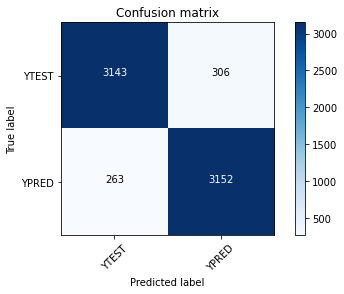

In [46]:
model.fit(X_train, y_train)
pred = model.predict(X_test)
score = accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score)
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=['YTEST', 'YPRED'])